<a href="https://colab.research.google.com/github/Bmartins25/Pratica01_UFJF_Mestrado/blob/main/RANSAC_TRABALHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#bibliotecas utilizadas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
def matcher(key_l_float,key_r_float,desc_l,desc_r):

    matcher = cv2.BFMatcher()
    rawMatches = matcher.knnMatch(desc_r,desc_l,2)
    matches = []

    for m in rawMatches:
                matches.append((m[0].trainIdx, m[0].queryIdx))

    x= np.float32([key_r_float[i] for (_, i) in matches])
    y= np.float32([key_l_float[i] for (i, _) in matches])

    (H, status) = cv2.findHomography(x, y, cv2.RANSAC)

    return (H,status,matches)


In [11]:
def solution(left_img, right_img):

    l_img=left_img
    r_img=right_img

    #conversão da imagem BGR - GRAY
    gr_l= cv2.cvtColor(l_img,cv2.COLOR_BGR2GRAY)
    gr_r= cv2.cvtColor(r_img,cv2.COLOR_BGR2GRAY)

    kaze = cv2.KAZE_create()

    key_l, desc_l = kaze.detectAndCompute(gr_l,None)
    key_r, desc_r= kaze.detectAndCompute(gr_r,None)

    key_l_float = np.float32([i.pt for i in key_l])
    key_r_float = np.float32([i.pt for i in key_r])


    H,s,m=matcher(key_l_float,key_r_float,desc_l,desc_r)

    result = cv2.warpPerspective(r_img, H,(r_img.shape[1] + l_img.shape[1], r_img.shape[0]))

    result[0:l_img.shape[0], 0:l_img.shape[1]] = l_img

    return result

if __name__ == "__main__":
    left_img = cv2.imread('left.jpg')
    right_img = cv2.imread('right.jpg')
    result_image = solution(left_img, right_img)
    cv2.imwrite('results/task2_result.jpg',result_image)

In [12]:
sift = cv2.xfeatures2d.SIFT_create()


In [13]:
keypoints_sift, descriptors = sift.detectAndCompute(left_img, None) #detecção de keypoints
keypoints_sift, descriptors = sift.detectAndCompute(right_img, None)

In [14]:
img = cv2.drawKeypoints(left_img, keypoints_sift, None)   #correspondência entre as imagens
img2 = cv2.drawKeypoints(right_img, keypoints_sift, None)

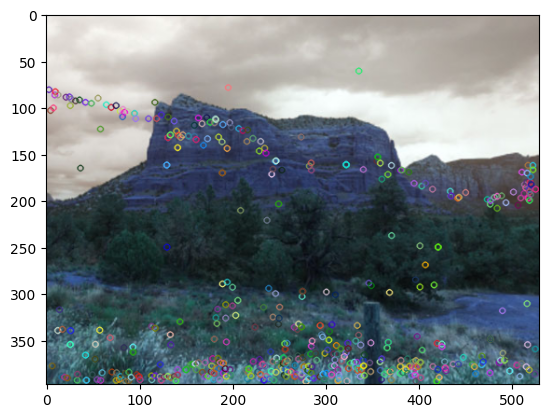

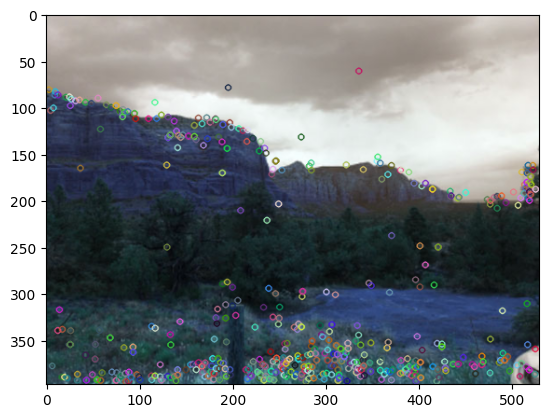

(<matplotlib.image.AxesImage at 0x7c047c8bddb0>, None)

In [15]:
plt.imshow(img),plt.show()
plt.imshow(img2),plt.show()

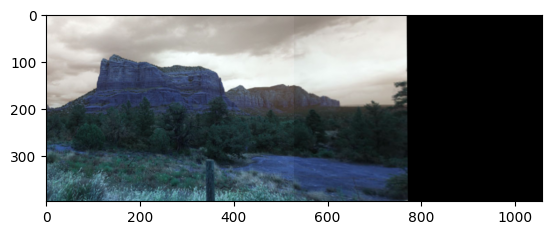

(<matplotlib.image.AxesImage at 0x7c047b620ac0>, None)

In [16]:
plt.imshow(result_image),plt.show()
